# Simple Linear Regression 

In this example we will consider sales based on 'TV' marketing budget. 

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [65]:
import pandas as pd

In [66]:
advertising = pd.read_csv("tvmarketing.csv")

Now, let's check the structure of the advertising dataset.

In [67]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [68]:
# Display the last 5 rows
advertising.tail()




,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [69]:
# Let's check the columns
advertising.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [70]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [71]:
advertising.corr()

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [72]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Seaborn

In [73]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

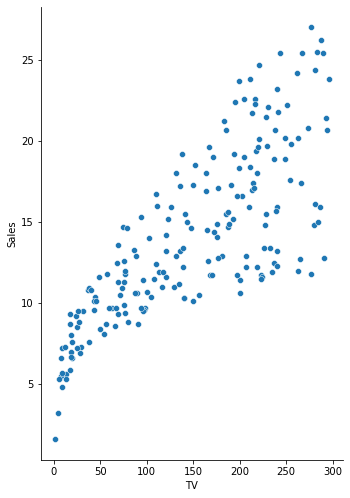

In [74]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(advertising, x_vars=['TV'], y_vars=['Sales'],size=7, aspect=0.7, kind='scatter')

# Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

In [75]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [76]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [77]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Splitting Data into Training and Testing Sets

In [78]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [79]:
len(X_train)

140

In [80]:
len(y_test)

60

In [81]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [25]:
X_train[:5]

 

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [26]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [83]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [84]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [30]:
X_train[:5]

array([[213.4],
       [151.5],
       [205. ],
       [142.9],
       [134.3]])

In [31]:
y_train[:5]

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

## Performing Linear Regression

In [85]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression


# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()



# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

## Having a look at the coefficients that the model has chosen:

In [33]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)



6.989665857411679
[0.04649736]


$y = 6.989 + 0.0464 \times TV $<br>

The formula estimates that for each increase of 1 dollar in tv
advertising costs, the expected sales are to increase by 0.0464


The value of c is approximately 6.98

This illustrates that your model predicts the response 6.98 when 𝑥 is zero.

The value m = 0.04 means that the predicted response rises by 0.04 when 𝑥 is increased by 1 unit.


Now, let's use this equation to predict our sales.

## Predictions
We can use model  for predictions with either existing or new data. To obtain the predicted response, use .predict():

In [34]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [35]:
y_pred[:5]

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747])

In [36]:
y_test[:5]


126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [37]:
#lets predict y when tvadv= 44.5
sales_predicted = lr.predict([[44.5]])


In [38]:
sales_predicted

array([9.05879832])

#### Computing RMSE and R^2 Values

Text(0, 0.5, 'Sales')

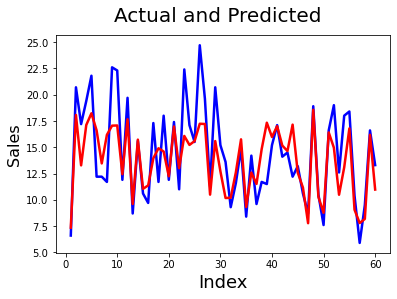

In [86]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

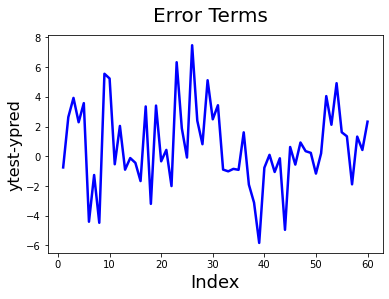

In [40]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [41]:
#Evaluation of regresion 

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mse

7.97579853285485

### Coefficient of Determination-R2 score

Coefficient of determination also called as R2 score is used to evaluate the performance
of a linear regression model.

It is the amount of the variation in the output (dependent attribute)
which is predictable from the input (independent variable(s)). 

It is used to check how well-observed results are reproduced by the model, depending
on the ratio of total deviation of results described by the model.

Mathematical Formula:

R2= 1- SSres / SStot

Where,
SSres is the sum of squares of the residual errors.

SStot is the total sum of the errors.

<b>Interpretation of R2 score:</b>

Assume R2 = 0.62

It can be referred that 62% of the changeability of the dependent output attribute

can be explained by the model while the remaining 38 % of the variability is still unaccounted for.

R2 indicates the proportion of data points which lie within the line created by the regression equation.

<b>A higher value of R2 is desirable as it indicates better results.</b>

http://media.geeksforgeeks.org/wp-content/uploads/20200603172827/img159.png

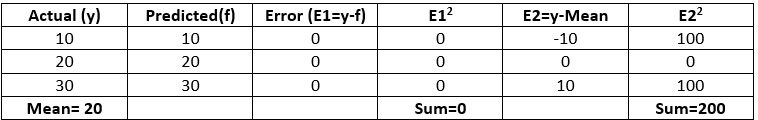

In [56]:
from IPython import display
display.Image("img159.png")

R2 = 1- 0/200 = 1

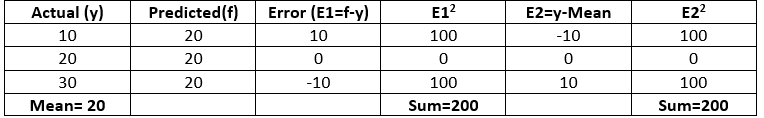

In [58]:
from IPython import display
display.Image("img248.png")

R2 = 1- 200/200 = 0

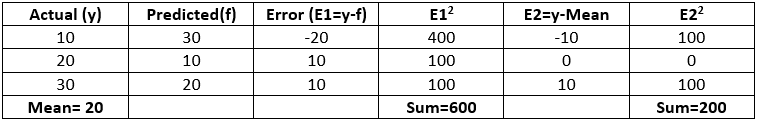

In [60]:
from IPython import display
display.Image("img331.png")

R2 = 1- 600/200 = -2

#We can import r2_score from sklearn.metrics in Python to compute R2 score.



In [62]:
from s
### Assume y is the actual value and f is the predicted values
y =[10, 20, 30]
f =[10, 20, 30]
r2 = r2_score(y, f)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 1.0


In [63]:
### Assume y is the actual value and f is the predicted values
y =[10, 20, 30]
f =[20, 20, 20]
r2 = r2_score(y, f)
print('r2 score for a model which predicts mean value always is', r2)

r2 score for a model which predicts mean value always is 0.0


In [64]:
### Assume y is the actual value and f is the predicted values
y = [10, 20, 30]
f = [30, 10, 20]
r2 = r2_score(y, f)
print('r2 score for a worse model is', r2)



r2 score for a worse model is -2.0


The best possible score is 1 which is obtained when the predicted values are the same as the actual values.

R2 score of baseline model is 0.

During the worse cases, R2 score can even be negative.

In [42]:
# R2 for above usecase
r_squared = r2_score(y_test, y_pred)

In [43]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.1619849326720724
MSE: 7.97579853285485
RMSE: 2.8241456288327007


Text(0, 0.5, 'Predicted Y')

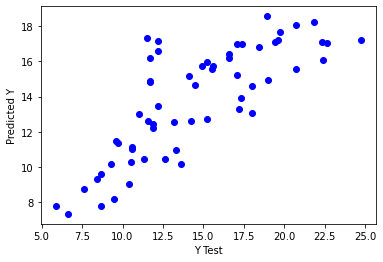

In [108]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred,color=["blue"])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

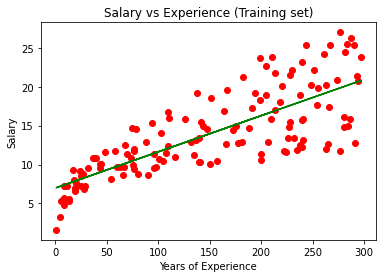

In [95]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Salary vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [ ]:
# The End....